In [ ]:
import sys
# Install packages correctly
!{sys.executable} -m pip install numpy sklearn tensorflow keras
# Fix mpl version due to subtle API differences
!{sys.executable} -m pip install matplotlib==3.0.3

In [13]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization,Conv2D,MaxPooling2D
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [14]:
img_rows,img_cols = 75,75
train_dir = './images/train'
validation_dir = './images/validation'
test_dir = './images/test'

### Initialising train and test data
#### Then rescaling them. All the other parameters in ImageDataGenerator for trai data are to create more sample images, like horizontal_flip will make a mirror image. hence increasing the size of out train dataset.

In [15]:
train_data = ImageDataGenerator(
                rescale=1./255,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                width_shift_range=0.3,
                height_shift_range=0.3,
                horizontal_flip=True,
                vertical_flip=True)
validation_data = ImageDataGenerator(rescale=1./255)
test_data = ImageDataGenerator(rescale=1./255)

### Generating data from the images in our directory

In [16]:
train_gen = train_data.flow_from_directory(
                                train_dir,
                                color_mode='grayscale',
                                target_size=(img_rows,img_cols),
                                batch_size=8,
                                class_mode='binary',
                                shuffle=True)
validation_gen = validation_data.flow_from_directory(
                                validation_dir,
                                color_mode='grayscale',
                                target_size=(img_rows,img_cols),
                                batch_size=8,
                                class_mode='binary',
                                shuffle=True)
test_gen = test_data.flow_from_directory(
                                test_dir,
                                color_mode='grayscale',
                                target_size=(img_rows,img_cols),
                                batch_size=8,
                                class_mode='binary',
                                shuffle=True)

Found 7005 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


#### Initialising our model to Sequential model provided by keras

In [56]:
mah_model = Sequential()

#### Adding 2D convolution layer with 32 as the dimensionality of the output space

In [57]:
mah_model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(75,75,1)))
mah_model.add(Activation('relu'))
mah_model.add(BatchNormalization())
mah_model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(75,75,1)))
mah_model.add(Activation('relu'))
mah_model.add(BatchNormalization())
mah_model.add(MaxPooling2D(pool_size=(2,2)))
mah_model.add(Dropout(0.2))

#### Adding 2D convolution layer with 64 as the dimensionality of the output space

In [58]:
mah_model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
mah_model.add(Activation('relu'))
mah_model.add(BatchNormalization())
mah_model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
mah_model.add(Activation('relu'))
mah_model.add(BatchNormalization())
mah_model.add(MaxPooling2D(pool_size=(2,2)))
mah_model.add(Dropout(0.2))

#### Flattening the output from convolution layers

In [59]:
mah_model.add(Flatten())
mah_model.add(Dense(64,kernel_initializer='he_normal'))
mah_model.add(Activation('relu'))
mah_model.add(BatchNormalization())
mah_model.add(Dropout(0.5))

#### sigmoid used as activation function as our input is either 0 or 1

In [60]:
mah_model.add(Dense(1))
mah_model.add(Activation('sigmoid'))

In [61]:
mah_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 75, 75, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_15 (Batc (None, 75, 75, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 75, 75, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 75, 75, 32)        0         
_________________________________________________________________
batch_normalization_16 (Batc (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 32)       

##### Save the model with best accuracy

In [62]:
checkpoint = ModelCheckpoint(
    'Cat_or_Dog.h5',
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1)

##### Stop if the accuracy of our model stops improving after 3 rounds

In [63]:
earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=3,
    verbose=1,
    restore_best_weights=True)

##### Reduce the learning rate if accuracy is not improving after 3 rounds

In [64]:
reduce_alpha = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    verbose=1,
    min_delta=0.0001)

In [65]:
callbacks = [checkpoint,earlystop,reduce_alpha]

In [66]:
mah_model.compile(
    loss='binary_crossentropy',
    optimizer="adam",
    metrics=['accuracy'])

In [67]:
no_train_img = 7005
no_validation_img = 1000

In [68]:
fit_model = mah_model.fit(
                train_gen,
                steps_per_epoch=no_train_img//8,
                epochs=10,
                callbacks=callbacks,
                validation_data=validation_gen,
                validation_steps=no_validation_img//8)

Epoch 1/10
875/875 [==============================] - ETA: 0s - loss: 0.7983 - accuracy: 0.5439
Epoch 00001: val_loss improved from inf to 1.91524, saving model to Cat_or_Dog.h5
875/875 [==============================] - 180s 206ms/step - loss: 0.7983 - accuracy: 0.5439 - val_loss: 1.9152 - val_accuracy: 0.5650 - lr: 0.0010
Epoch 2/10
875/875 [==============================] - ETA: 0s - loss: 0.7028 - accuracy: 0.5567
Epoch 00002: val_loss improved from 1.91524 to 0.70327, saving model to Cat_or_Dog.h5
875/875 [==============================] - 162s 185ms/step - loss: 0.7028 - accuracy: 0.5567 - val_loss: 0.7033 - val_accuracy: 0.5750 - lr: 0.0010
Epoch 3/10
875/875 [==============================] - ETA: 0s - loss: 0.6700 - accuracy: 0.5841
Epoch 00003: val_loss improved from 0.70327 to 0.67876, saving model to Cat_or_Dog.h5
875/875 [==============================] - 166s 189ms/step - loss: 0.6700 - accuracy: 0.5841 - val_loss: 0.6788 - val_accuracy: 0.5880 - lr: 0.0010
Epoch 4/10
875

#### Testing the model on test dataset

In [22]:
import numpy as np
from keras.models import load_model
my_model = load_model('./Cat_or_Dog.h5')
no_test_img = 2023
pred= my_model.predict(test_gen, no_test_img // 8)

#### Calculating the accuracy of model on test dataset 

In [42]:
tl = np.array([])
for i in range(len(test_gen)):
    tl = np.append(tl,test_gen[i][1])
correct = 0.
total_test = len(pred)
for i in range(len(pred)):
    if (pred[i]>0.5 and tl[i]==1) or (pred[i]<=0.5 and tl[i]==0):
        correct = correct + 1
test_accuracy = correct/total_test
print(test_accuracy)

0.4967869500741473


In [6]:
import cv2
import os
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from PIL import Image

In [7]:
saved_model = load_model('./Cat_or_Dog.h5')
plabels = ['Cat','Dog']

#### Some random test cases

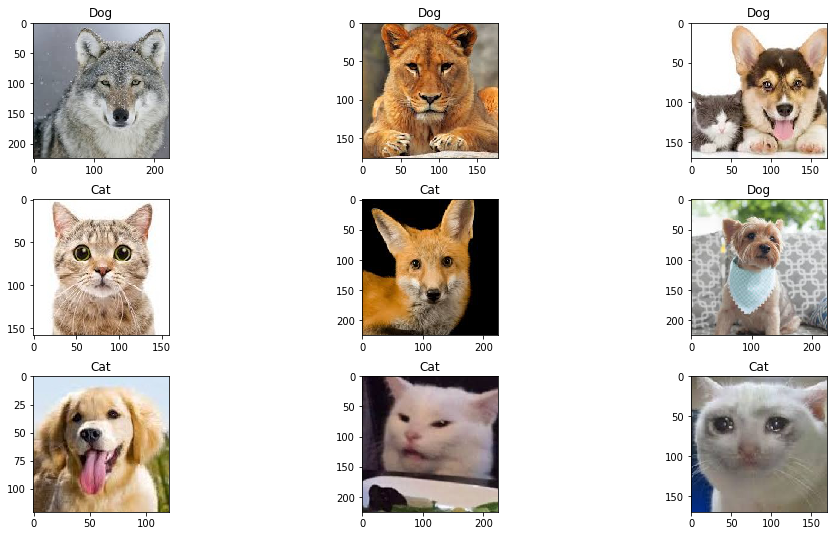

In [43]:
funtest_dir = "./images/funtest"
index = 1
fig = plt.figure(figsize=(16,9))
fig.subplots_adjust(hspace=0.3, wspace=0.4)
for image in os.listdir(funtest_dir):
    image_path = os.path.join(funtest_dir, image)
    img_data = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_data, (75, 75))
    new_img_data = new_img_array.astype('float')/255
    new_img_data = new_img_data.reshape(1, 75, 75, 1)
    prediction = saved_model.predict(new_img_data)[0]
    i = Image.open(image_path)
    iar = np.asarray(i)
    ax = fig.add_subplot(3, 3, index)
    plt.imshow(iar)
    imgplot = plt.imshow(iar)
    if(prediction[0]>0.5):
        ax.set_title(plabels[1])
    else:
        ax.set_title(plabels[0])
    index = index + 1